In [30]:
# Imports
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
import cv2
import os

In [31]:
image = cv2.imread('treino/lego11.jpg')

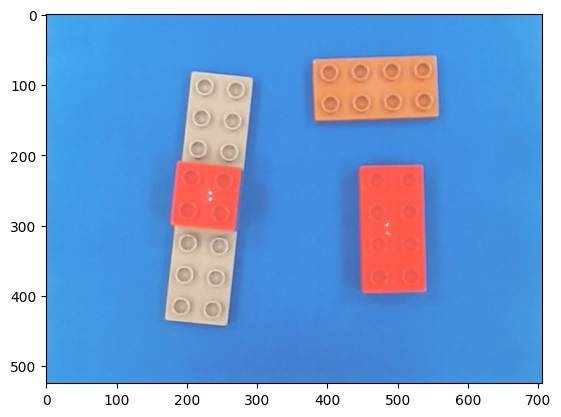

In [32]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [33]:
grayImage = cv2.cvtColor(image,cv2.COLOR_BGRA2GRAY)

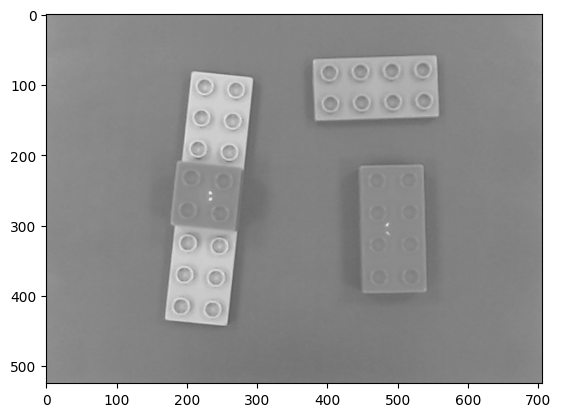

In [34]:

plt.imshow(cv2.cvtColor(grayImage,cv2.COLOR_GRAY2BGR))

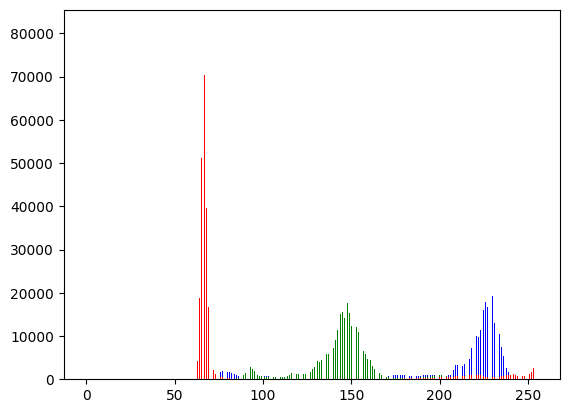

In [35]:
hist0 = cv2.calcHist([image],[0],None,[256],(0,255))
hist1 = cv2.calcHist([image],[1],None,[256],(0,255))
hist2 = cv2.calcHist([image],[2],None,[256],(0,255))
ind = np.arange(256)
width = 0.35
pl0 = plt.bar(ind,np.squeeze(hist0),width,color='b')
pl1 = plt.bar(ind,np.squeeze(hist1),width,color='g')
pl2 = plt.bar(ind,np.squeeze(hist2),width,color='r')
plt.show()

In [36]:
aux = cv2.GaussianBlur(image[:,:,2],(5,5),0)
res, thresh = cv2.threshold(aux,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


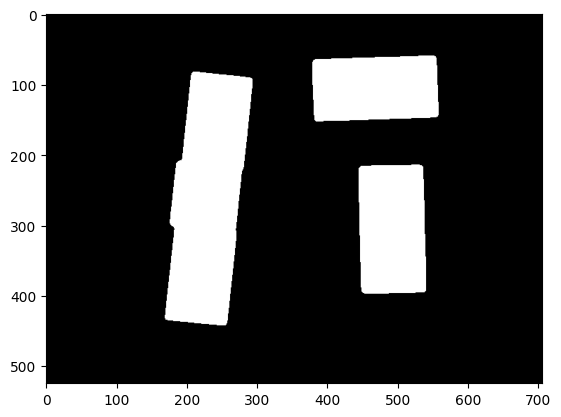

In [37]:
plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB))

In [38]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
erosion = cv2.erode(thresh,kernel,1)
# dilation = cv2.dilate(erosion,kernel,1)


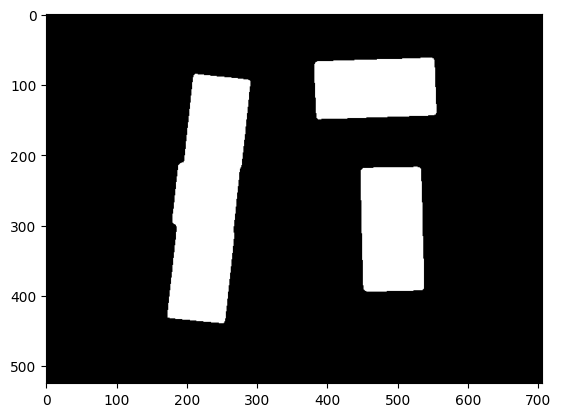

In [39]:
plt.imshow(erosion,'gray',vmin=0,vmax=255)

3


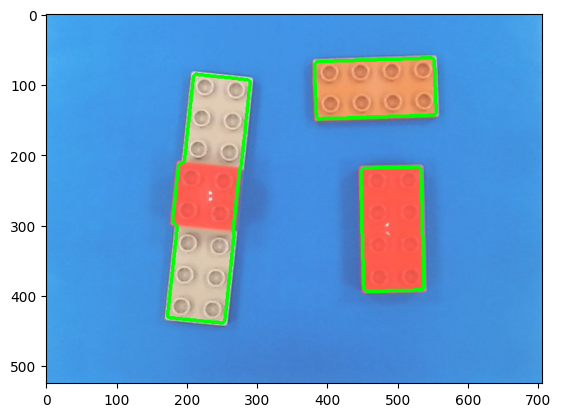

In [40]:
contours, hierarchy = cv2.findContours(erosion,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print(str(len(contours)))
cv2.drawContours(image,contours,-1,(0,255,0),3)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))